# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('../data/titanic_train.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


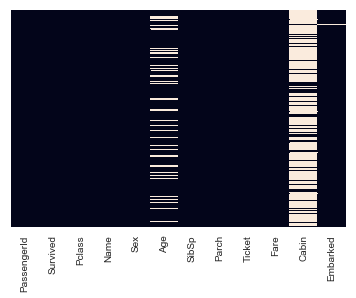

In [40]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

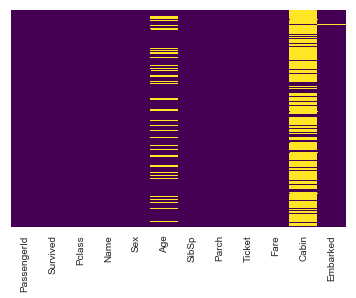

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
sns.set_style('whitegrid')

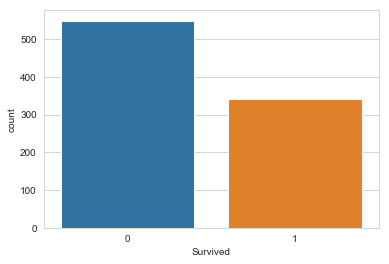

In [16]:
sns.countplot(x='Survived', data=train)

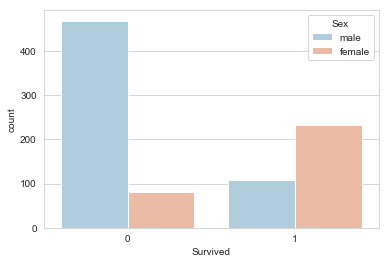

In [18]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

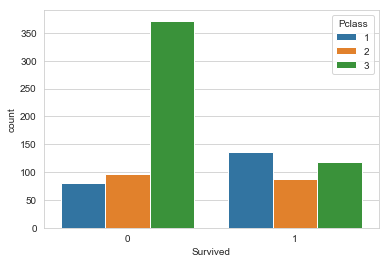

In [22]:
sns.countplot(x='Survived', data=train, hue='Pclass')

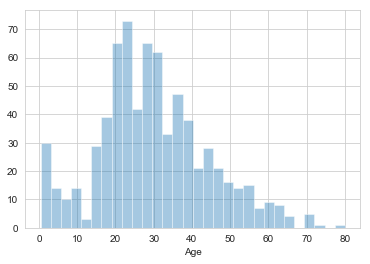

In [27]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

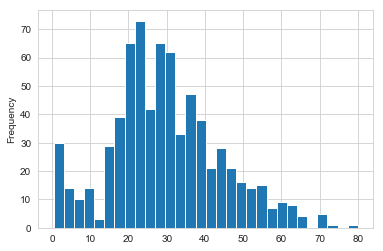

In [29]:
train['Age'].plot.hist(bins=30)

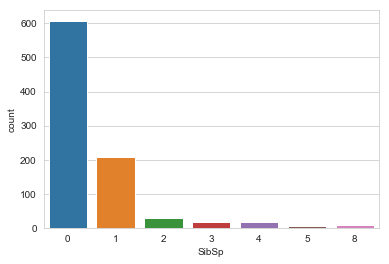

In [30]:
sns.countplot(x='SibSp', data=train)

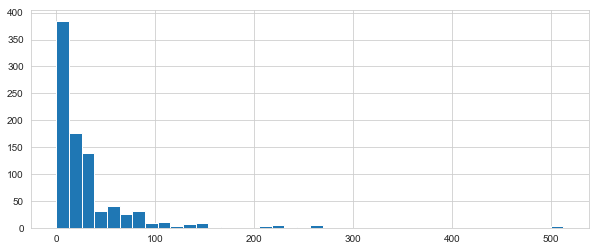

In [31]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [32]:
import cufflinks as cf
cf.go_offline()

In [35]:
#train['Fare'].iplot(kind='hist', bins=40)

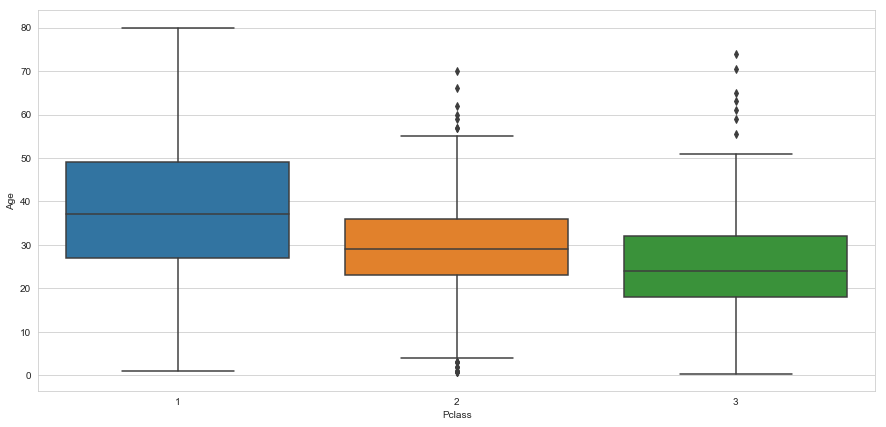

In [47]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [49]:
def impute_age(cols):
    Age =cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [50]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

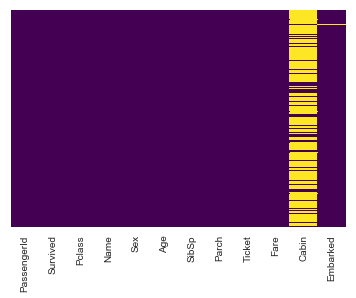

In [56]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [59]:
train.drop('Cabin', axis=1,inplace=True)

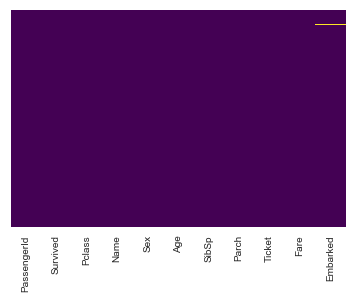

In [69]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [80]:
train.info()
#train.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


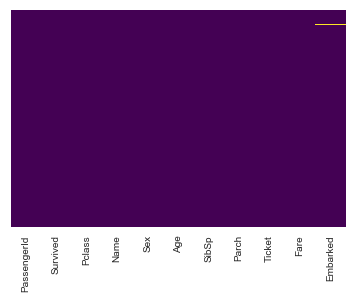

In [86]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [88]:
train['Embarked'].dropna(inplace=True)

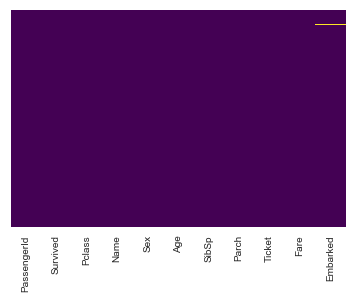

In [89]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [91]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [92]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [93]:
train = pd.concat([train, sex,embark], axis=1)

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0.0,1.0


In [95]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [96]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1,0.0,1.0


In [100]:
train.drop('PassengerId', axis=1, inplace=True)

In [101]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0.0,1.0
1,1,1,38.0,1,0,71.2833,0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1,0.0,1.0


In [109]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [111]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0.0,1.0
1,1,38.0,1,0,71.2833,0,0.0,0.0
2,3,26.0,0,0,7.9250,0,0.0,1.0
3,1,35.0,1,0,53.1000,0,0.0,1.0
4,3,35.0,0,0,8.0500,1,0.0,1.0


In [122]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [132]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [143]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 520 to 863
Data columns (total 8 columns):
Pclass    623 non-null int64
Age       623 non-null float64
SibSp     623 non-null int64
Parch     623 non-null int64
Fare      623 non-null float64
male      623 non-null uint8
Q         622 non-null float64
S         622 non-null float64
dtypes: float64(4), int64(3), uint8(1)
memory usage: 39.5 KB


In [142]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 331 to 829
Data columns (total 8 columns):
Pclass    268 non-null int64
Age       268 non-null float64
SibSp     268 non-null int64
Parch     268 non-null int64
Fare      268 non-null float64
male      268 non-null uint8
Q         267 non-null float64
S         267 non-null float64
dtypes: float64(4), int64(3), uint8(1)
memory usage: 17.0 KB


In [147]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

In [166]:
y_test.head()

331    0
700    1
748    0
751    1
481    0
Name: Survived, dtype: int64

In [198]:
logmodel.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [120]:
prediction = logmodel.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [159]:
from sklearn.metrics import classification_report

In [162]:
print(classification_report(y_test,prediction))

NameError: name 'prediction' is not defined

In [113]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.004536,-0.151777
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.220558,0.076466
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.080875,0.013598
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026692,0.069438
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081585,0.061512
Fare,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.116684,-0.163758
male,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


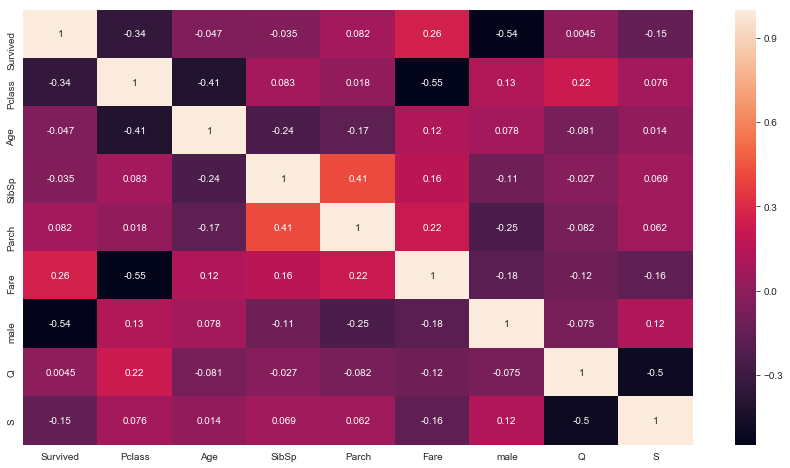

In [114]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True)